In [25]:
import pandas as pd
import math
import numpy as np
from scipy.stats import norm
import datetime as dt

# fetching data
import yfinance as yf

In [26]:
stocks = ['SPY']
years = 1
endDate = dt.datetime.now()
startDate = endDate- dt.timedelta(days = 365*years)
adj_close_stock = yf.download(stocks, start=startDate, end=endDate)['Adj Close']

print(adj_close_stock)

[*********************100%***********************]  1 of 1 completed

Ticker             SPY
Date                  
2023-12-22  469.225250
2023-12-26  471.206573
2023-12-27  472.058563
2023-12-28  472.236877
2023-12-29  470.869751
...                ...
2024-12-16  606.789978
2024-12-17  604.289978
2024-12-18  586.280029
2024-12-19  586.099976
2024-12-20  594.250000

[251 rows x 1 columns]


In [27]:
Change_in_price = adj_close_stock.pct_change()
print(Change_in_price)


Ticker           SPY
Date                
2023-12-22       NaN
2023-12-26  0.004223
2023-12-27  0.001808
2023-12-28  0.000378
2023-12-29 -0.002895
...              ...
2024-12-16  0.004270
2024-12-17 -0.004120
2024-12-18 -0.029803
2024-12-19 -0.000307
2024-12-20  0.013906

[251 rows x 1 columns]


In [28]:
#Defining variables
S = 586.1 #underlying price
K = 550 #strike price
T = 0.01643835616 #time
r = 4.50 #risk-free rate
vol = np.std(Change_in_price)*np.sqrt(252) #volatility(sigma sign)
print(vol)


Ticker
SPY    0.12448
dtype: float64


In [50]:
N = 5
delta = T/N
u = np.exp(vol*np.sqrt(delta))
d = 1/u
p = (np.exp(r*0.01*delta)-d)/(u-d)


In [51]:
s_u = u*S
s_d = d*S
print(s_u,s_d)
C_u = s_d-K
C_d = 0
C = np.exp(-r*0.01*T)*(p*C_u +(1-p)*C_d)
print(C)

Ticker
SPY    590.298242
dtype: float64 Ticker
SPY    581.931616
dtype: float64
Ticker
SPY    16.227782
dtype: float64


[19.60349713 27.79287783 36.1        44.52655645 53.07426434]


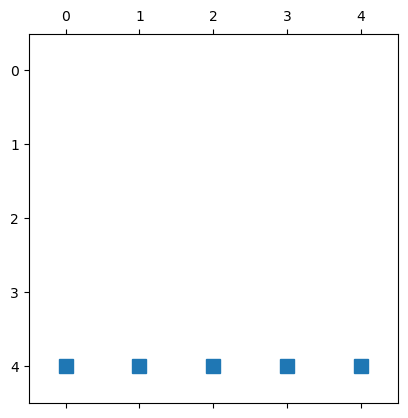

In [57]:
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix
from scipy.stats import bernoulli

stock_prices = csc_matrix((N,N))
call_prices = csc_matrix((N,N))

stock_prices[0,0] = S

for i in range(1,N):
    M = i+1
    stock_prices[i,0]= d*stock_prices[i-1,0]
    for j in range(1,M):
        stock_prices[i,j] = u*stock_prices[i-1,j-1]

expiration = stock_prices[-1,:].toarray()-K
expiration.shape = (expiration.size,)
expiration = np.where(expiration >=0, expiration, 0)

call_prices[-1,:] = expiration
plt.spy(call_prices)
print(expiration)


36.339261762187455


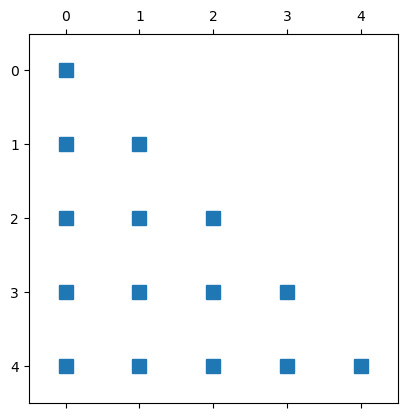

In [53]:
for i in range(N-2,-1,-1):
    for j in range(i+1):
        call_prices[i,j] = np.exp(-r*0.01*T)*((1-p)*call_prices[i+1,j]+p*call_prices[i+1,j+1])

plt.spy(call_prices)
print(call_prices[0,0])

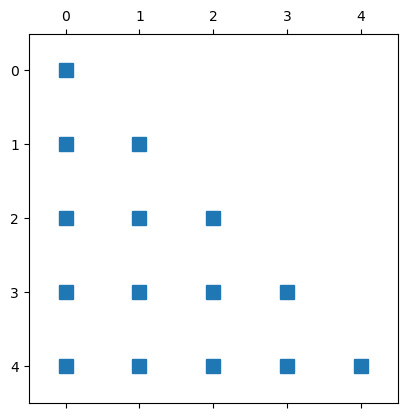

In [56]:
plt.spy(stock_prices)